In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

In [83]:
bb_data = pd.read_csv('BBSTATS.csv', encoding='ISO-8859-1')

In [84]:
bb_data.head(10)

,ï»¿Year,Player Name,School,Pos,Allstar/BT,G,AB,R,H,2B,...,BB%,SO%,SO/BB,AB/HR,HR%,XBH%,HiLvl,MLB Years,Stat Years,Player Name.1
0,2003-2006,Aaron Bates,NC State,1B,N,167,602,154,220,44,...,12.53,10.42,0.83,25.1,3.17,31.36,MLB,2009-2009,2003-2014,Aaron Bates
1,2002-2003,Aaron Hill,LSU,2B,N,124,487,114,168,45,...,11.55,7.07,0.61,27.1,3.1,41.07,MLB,2005-2017,2001-2017,Aaron Hill
2,2011-2013,Aaron Judge,Fresno State,OF,Y,169,594,130,205,41,...,15.06,19.11,1.27,33,2.51,32.2,MLB,2016-2020,2011-2020,Aaron Judge
3,2008-2010,Adam Eaton,Miami,CF-LF,N,158,621,169,211,45,...,7.85,11.57,1.47,25.9,3.19,41.23,MLB,2012-2020,2008-2020,Adam Eaton
4,2011-2013,Adam Engel,Louisville,OF,N,169,604,121,160,15,...,8.69,11.59,1.33,302,0.28,11.88,MLB,2017-2020,2011-2020,Adam Engel
5,2011-2013,Adam Frazier,Mississippi State,SS,N,172,642,117,223,36,...,10.24,8.49,0.83,--,--,19.73,MLB,2016-2020,2011-2020,Adam Frazier
6,2002-2002,Adam Greenberg,North Carolina,OF,N,64,267,80,90,17,...,13.37,14.89,1.11,15.7,5.17,45.56,MLB,2005-2012,2000-2013,Adam Greenberg
7,2015-2017,Adam Haseley,Virginia,OF,N,186,746,185,231,46,...,12.56,11.65,0.93,35.5,2.38,33.33,MLB,2019-2020,2015-2020,Adam Haseley
8,2003-2004,Adam Lind,South Alabama,1B-DH,Y,114,441,107,164,37,...,8.91,9.11,1.02,22.1,4.05,37.2,MLB,2006-2017,2003-2018,Adam Lind
9,2006-2006,Adam Moore,"Northeast Texas CC,Â Texas-Arlington,Â Nebraska",C,N,65,254,54,89,22,...,10.37,12.37,1.19,25.4,3.34,37.08,MLB,2009-2018,2005-2019,Adam Moore


In [85]:
bb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿Year        653 non-null    object 
 1   Player Name    654 non-null    object 
 2   School         650 non-null    object 
 3   Pos            654 non-null    object 
 4   Allstar/BT     654 non-null    object 
 5   G              654 non-null    int64  
 6   AB             654 non-null    int64  
 7   R              654 non-null    int64  
 8   H              654 non-null    int64  
 9   2B             654 non-null    int64  
 10  3B             654 non-null    int64  
 11  HR             654 non-null    int64  
 12  RBI            654 non-null    int64  
 13  SB             654 non-null    int64  
 14  CS             654 non-null    int64  
 15  BB             654 non-null    int64  
 16  SO             654 non-null    int64  
 17  HBP            654 non-null    int64  
 18  SH        

In [86]:
bb_data = bb_data.rename(columns = {'ï»¿Year':'Year'})
                         
bb_data

,Year,Player Name,School,Pos,Allstar/BT,G,AB,R,H,2B,...,BB%,SO%,SO/BB,AB/HR,HR%,XBH%,HiLvl,MLB Years,Stat Years,Player Name.1
0,2003-2006,Aaron Bates,NC State,1B,N,167,602,154,220,44,...,12.53,10.42,0.83,25.1,3.17,31.36,MLB,2009-2009,2003-2014,Aaron Bates
1,2002-2003,Aaron Hill,LSU,2B,N,124,487,114,168,45,...,11.55,7.07,0.61,27.1,3.1,41.07,MLB,2005-2017,2001-2017,Aaron Hill
2,2011-2013,Aaron Judge,Fresno State,OF,Y,169,594,130,205,41,...,15.06,19.11,1.27,33,2.51,32.2,MLB,2016-2020,2011-2020,Aaron Judge
3,2008-2010,Adam Eaton,Miami,CF-LF,N,158,621,169,211,45,...,7.85,11.57,1.47,25.9,3.19,41.23,MLB,2012-2020,2008-2020,Adam Eaton
4,2011-2013,Adam Engel,Louisville,OF,N,169,604,121,160,15,...,8.69,11.59,1.33,302,0.28,11.88,MLB,2017-2020,2011-2020,Adam Engel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,2010-2012,Zach Vincej,Pepperdine,SS,N,145,525,91,148,32,...,6.39,13.42,2.1,175,0.48,24.32,MLB,2017-2018,2010-2019,Zach Vincej
650,2008-2010,Zach Walters,San Diego,SS,N,117,398,65,125,21,...,7.8,12.47,1.6,79.6,1.11,26.4,MLB,2013-2016,2008-2018,Zach Walters
651,2005-2007,Zack Collins,Miami,C,N,189,637,147,203,38,...,21.1,19.55,0.93,15.2,5.01,43.35,MLB,2019-2020,2014-2020,Zack Collins
652,2005-2007,Zack Cozart,Mississippi,SS,Y,197,757,159,235,45,...,7.22,9.55,1.32,31.5,2.79,30.64,MLB,2011-2019,2005-2019,Zack Cozart


In [87]:
bb_data.dtypes

Year              object
Player Name       object
School            object
Pos               object
Allstar/BT        object
G                  int64
AB                 int64
R                  int64
H                  int64
2B                 int64
3B                 int64
HR                 int64
RBI                int64
SB                 int64
CS                 int64
BB                 int64
SO                 int64
HBP                int64
SH                 int64
SF                 int64
GDP                int64
AVG              float64
OBP              float64
SLG              float64
OPS              float64
PA                 int64
TB                 int64
XBH                int64
SECA             float64
ISO              float64
BABIP            float64
BB%               object
SO%               object
SO/BB             object
AB/HR             object
HR%               object
XBH%              object
HiLvl             object
MLB Years         object
Stat Years        object


In [88]:
bb_data['Player Name'].unique() #Check for repeated baseball players names

array(['Aaron Bates', 'Aaron Hill', 'Aaron Judge', 'Adam Eaton',
       'Adam Engel', 'Adam Frazier', 'Adam Greenberg', 'Adam Haseley',
       'Adam Lind', 'Adam Moore', 'Adam Rosales', 'AJ Ellis',
       'AJ Pollock', 'AJ Reed', 'Alec Bohm', 'Alex Avila',
       'Alex Blandino', 'Alex Bregman', 'Alex Dickerson', 'Alex Gordon',
       'Alex Hassan', 'Alex Mejia', 'Alex Presley', 'Allan Dykstra',
       'Allen Craig', 'Andre Ethier', 'Andrew Benintendi', 'Andrew Brown',
       'Andrew Knapp', 'Andrew Knizner', 'Andrew Romine',
       'Andrew Stevenson', 'Andrew Susac', 'Andrew Toles', 'Andy Burns',
       'Andy Dirks', 'Andy Parrino', 'Andy Wilkins', 'Andy Young',
       'Anthony Bemboom', 'Anthony Rendon', 'Antoan Richardson',
       'Aramis Garcia', 'Austin Barnes', 'Austin Hays', 'Austin Nola',
       'Austin Slater', 'Austin Wynns', 'Beau Taylor', 'Ben Francisco',
       'Ben Paulsen', 'Ben Zobrist', 'Billy Burns', 'Blake Davis',
       'Blake Lalli', 'Blake Smith', 'Blake Tekotte',

In [89]:
bb_data['Player Name'].nunique()

653

In [90]:
bb_data['Player Name'].value_counts()

Matt Duffy         2
Konrad Schmidt     1
Shane Costa        1
Matt Carson        1
Alex Mejia         1
                  ..
Kevin Mahar        1
Adam Lind          1
Jacob Stallings    1
Jordan Danks       1
Tony Gwynn         1
Name: Player Name, Length: 653, dtype: int64

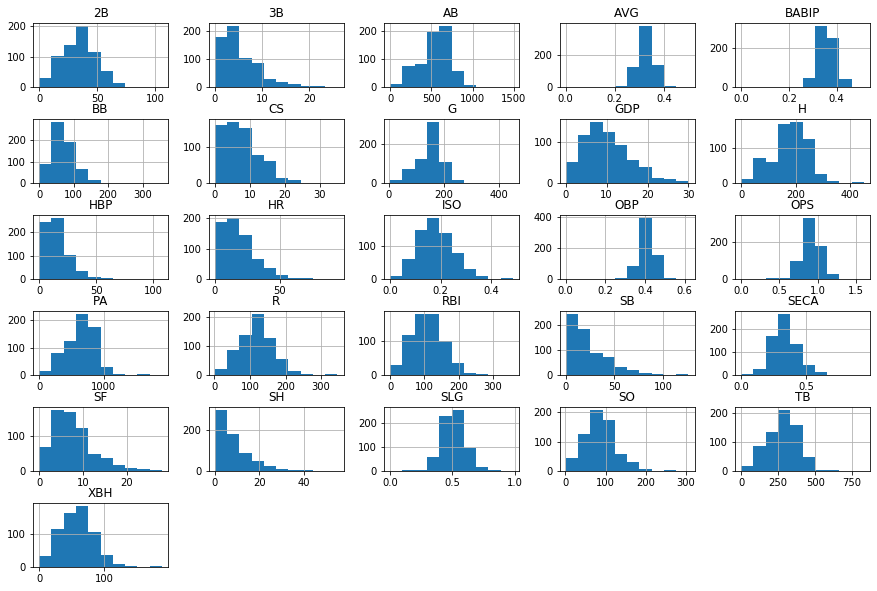

In [127]:
bb_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [107]:
bb_data['Allstar/BT'] = bb_data['Allstar/BT'].apply(lambda x: x.strip())

In [111]:
AS_data = bb_data.groupby('Allstar/BT')[['R','H','HR','RBI','AVG','OBP','SLG', 'OPS','XBH']].mean()

In [112]:
AS_data.head()

,R,H,HR,RBI,AVG,OBP,SLG,OPS,XBH
Allstar/BT,,,,,,,,,
N,114.951641,175.540587,17.492228,105.953368,0.321843,0.406458,0.499677,0.906121,56.651123
Y,135.426667,199.213333,22.973333,126.106667,0.346600,0.435693,0.554640,0.990293,67.293333


In [113]:
AS_data.reset_index(level=0, inplace = True)
AS_data

,Allstar/BT,R,H,HR,RBI,AVG,OBP,SLG,OPS,XBH
0,N,114.951641,175.540587,17.492228,105.953368,0.321843,0.406458,0.499677,0.906121,56.651123
1,Y,135.426667,199.213333,22.973333,126.106667,0.346600,0.435693,0.554640,0.990293,67.293333


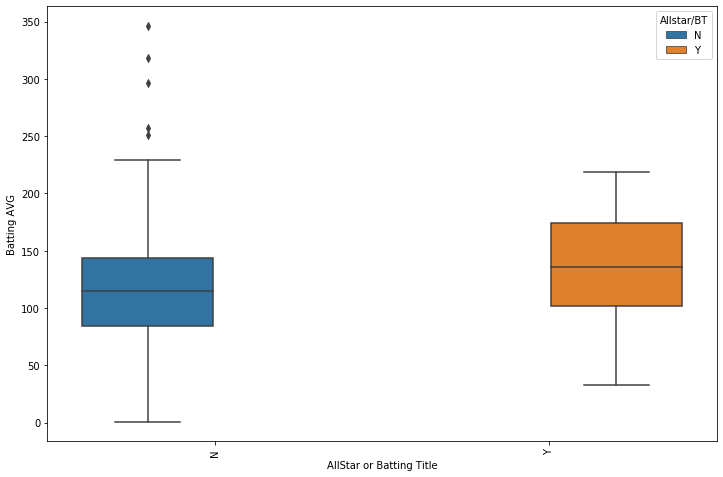

In [133]:
#sep charts; boxplots
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='R', hue = 'Allstar/BT' , data= bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Batting AVG')
plt.xlabel('AllStar or Batting Title');

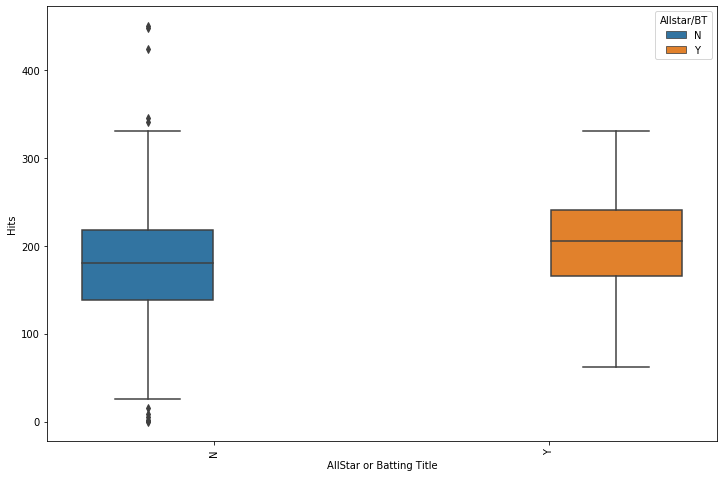

In [134]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='H', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Hits')
plt.xlabel('AllStar or Batting Title');

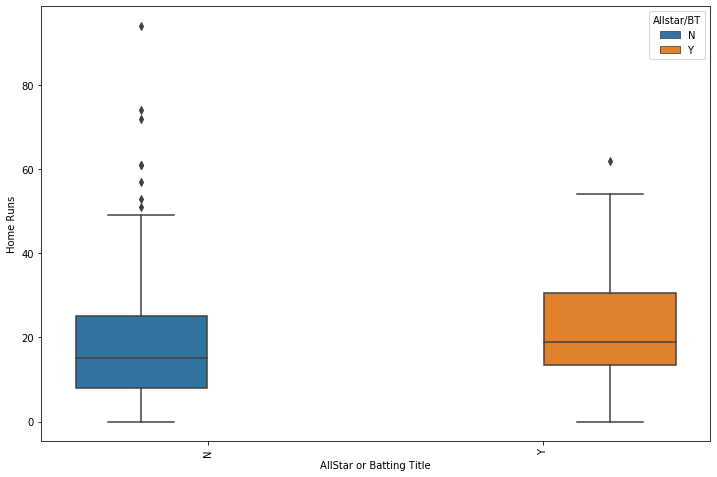

In [135]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='HR', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Home Runs')
plt.xlabel('AllStar or Batting Title');

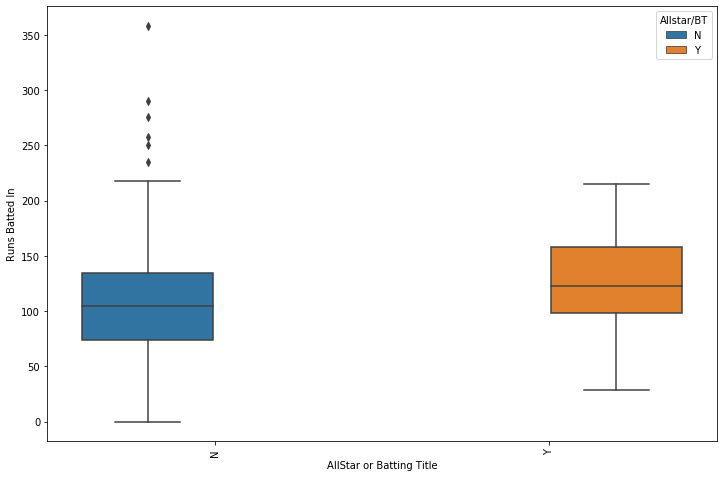

In [136]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='RBI', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Runs Batted In')
plt.xlabel('AllStar or Batting Title');

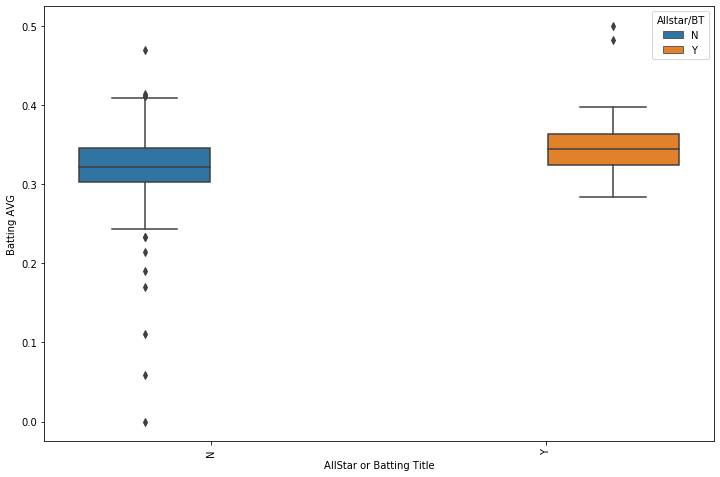

In [137]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='AVG', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Batting AVG')
plt.xlabel('AllStar or Batting Title');
plt.show()

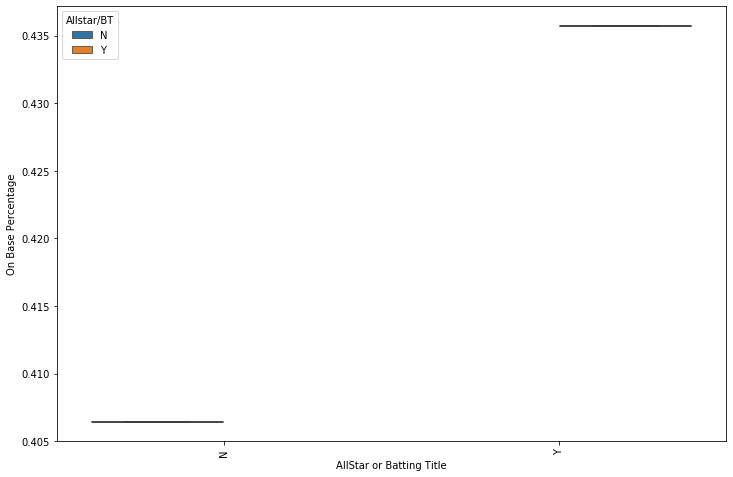

In [138]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='OBP', hue = 'Allstar/BT' , data=AS_data)
plt.xticks(rotation='vertical')
plt.ylabel('On Base Percentage')
plt.xlabel('AllStar or Batting Title');

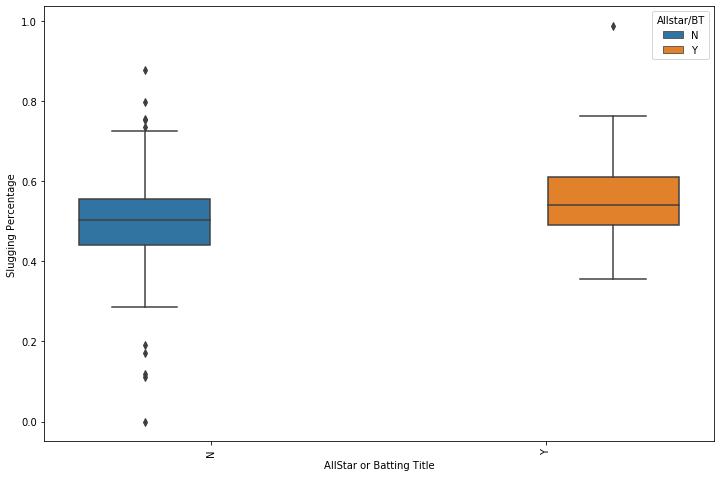

In [139]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='SLG', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Slugging Percentage')
plt.xlabel('AllStar or Batting Title');

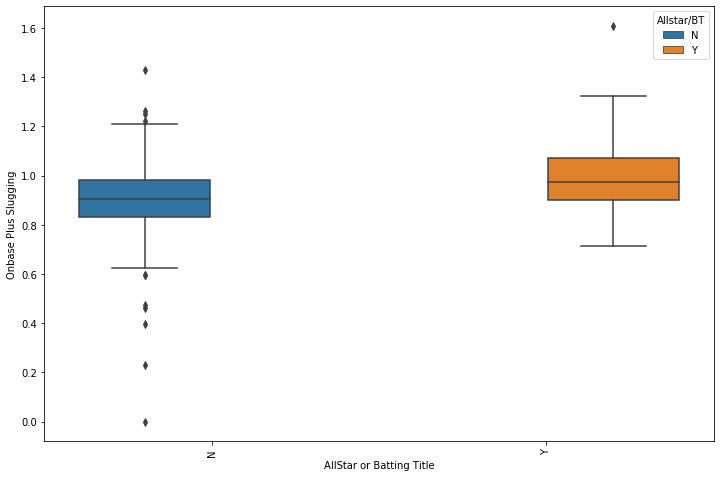

In [140]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='OPS', hue = 'Allstar/BT' , data=bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Onbase Plus Slugging')
plt.xlabel('AllStar or Batting Title');

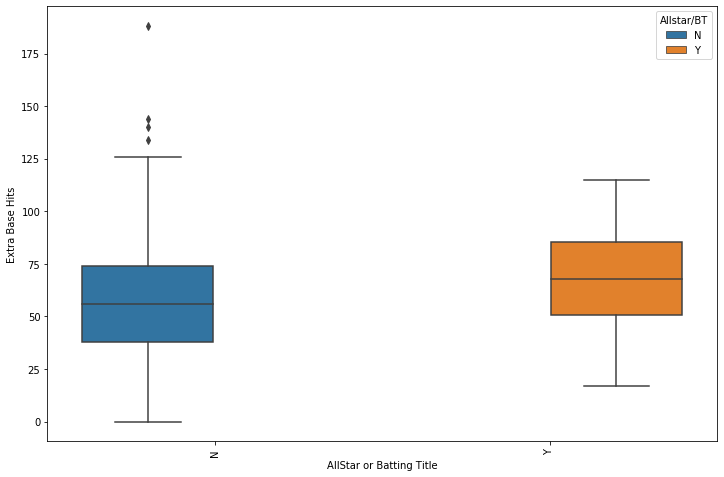

In [141]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Allstar/BT', y='XBH', hue = 'Allstar/BT' , data= bb_data)
plt.xticks(rotation='vertical')
plt.ylabel('Extra Base Hits')
plt.xlabel('AllStar or Batting Title');

In [128]:
datapath = 'data'

if not os.path.exists(datapath):
    os.mkdir(datapath)

In [130]:
datapath_bbdata = os.path.join(datapath, 'bb_data_cleaned.csv')
if not os.path.exists(datapath_bbdata):
    bb_data.to_csv(datapath_bbdata, index=False)